# Sentence Segmentation
We want to break down our documents into sentences and parse them for tokens. Further analysis is to be performed on the three datasets' segmentation results to compare them.

In [2]:
import nltk.data
import os
FOOD_REV_DIR = './../tokenizer/food_reviews_scraping'
CV_PAPER_DIR = './../tokenizer/Deep Learning and Computer Vision papers'
GAME_DIR = './../tokenizer/darren_documents'


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

### 1.1 Testing Sentence Segmentation with NLTK's PunktSentenceTokenizer
NLTK provides a sentence tokenizer that has been pretrained using an English corpus. The tokenizer uses an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. The library provides unique sentence tokenizers for different languages.

In [3]:
text = "Wow there you go.Fastest car in the city. In Singapore."
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
print('\n-----\n'.join(sent_detector.tokenize(text.strip())))

Wow there you go.Fastest car in the city.
-----
In Singapore.


Here, we see that the sentence tokenizer is actually relatively unreliable when it comes to parsing the EOL token. We have 2 sentences combined into one when we remove a spacing. 

In [4]:
for file in os.listdir(FOOD_REV_DIR):
    with open(os.path.join(FOOD_REV_DIR,file),'r') as f:
        text = f.readlines()[0]
        print("Original text of:",file)
        print(text)
        print("\nSentence Segmented Text: ")
        for line in sent_detector.tokenize(text.strip()):
            print(line)
            print('\n-------\n')
        break


Original text of: document9.txt
Not to be confused with Dim Sum Haus at Jalan Besar, Dim Sum House is a relatively new store at Yio Chu Kang Road.The humble-looking eatery serves items reasonably priced around the $4 to $5 range.Of course ’affordable’ dim sum is subjective as there are always other places such as Kuai San Dian Xin 块三点心. (Also read: 10 Off-Peak Dining Deals For Affordable Dim Sum) That same ulu stretch of Yio Chu Kang Road seems to be bustling with activities.If you need your coffee and cakes, relatively recent café additions include Urban Table, Amber Ember and Two Bakery – all within a short walking distance. The location used to be occupied by another Chinese eatery, which unfortunately did not survive the low footfall of this area.Let’s have better faith for Dim Sum House. What caught my attention were the adorable animal buns which usually require effort to craft. While the names are not clearly stated on the menu, there is the “Porcupine” Red Bean Paste Bun ($4.50

Here, the same issue becomes much more obvious. We see that the parser is unable to separate sentences if the use of "." is not followed by a space.

### 1.2 Using Stanza by Stanford NLP on Food Reviews Scraping Dataset

In [5]:
import stanza

# stanza.download('en', processors='tokenize')
nlp = stanza.Pipeline(lang='en', processors='tokenize')
doc = nlp(text)
for i, sentence in enumerate(doc.sentences):
    print('\n-----\n')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

2020-10-30 23:40:23 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | ewt     |

2020-10-30 23:40:23 INFO: Use device: cpu
2020-10-30 23:40:23 INFO: Loading: tokenize
2020-10-30 23:40:23 INFO: Done loading processors!



-----

id: (1,)	text: Not
id: (2,)	text: to
id: (3,)	text: be
id: (4,)	text: confused
id: (5,)	text: with
id: (6,)	text: Dim
id: (7,)	text: Sum
id: (8,)	text: Haus
id: (9,)	text: at
id: (10,)	text: Jalan
id: (11,)	text: Besar
id: (12,)	text: ,
id: (13,)	text: Dim
id: (14,)	text: Sum
id: (15,)	text: House
id: (16,)	text: is
id: (17,)	text: a
id: (18,)	text: relatively
id: (19,)	text: new
id: (20,)	text: store
id: (21,)	text: at
id: (22,)	text: Yio
id: (23,)	text: Chu
id: (24,)	text: Kang
id: (25,)	text: Road
id: (26,)	text: .

-----

id: (1,)	text: The
id: (2,)	text: humble
id: (3,)	text: -
id: (4,)	text: looking
id: (5,)	text: eatery
id: (6,)	text: serves
id: (7,)	text: items
id: (8,)	text: reasonably
id: (9,)	text: priced
id: (10,)	text: around
id: (11,)	text: the
id: (12,)	text: $
id: (13,)	text: 4
id: (14,)	text: to
id: (15,)	text: $
id: (16,)	text: 5
id: (17,)	text: range
id: (18,)	text: .

-----

id: (1,)	text: Of
id: (2,)	text: course
id: (3,)	text: ’
id: (4,)	text: affordable
i

The sentences and tokens generated by Stanza appear to be much more consistent for the Food Reviews Scraping dataset.
We can see 2 main details:
1. symbols such as ", (, ) and . are seen as tokens.
2. Float numbers are recognised and not used as EOS tokens.

In [6]:
def segment_sentences(directory):
    sentence_length = []
    print("Checking:",os.path.basename(directory))
    for file in os.listdir(directory):
        with open(os.path.join(directory,file),'r') as f:
            text = f.read()
            doc = nlp(text)
            for i, sentence in enumerate(doc.sentences):
                sentence_length.append(len(sentence.tokens))
    counter = Counter(sentence_length)
#     print(sentence_length)
    return counter
counter = segment_sentences(FOOD_REV_DIR)

Checking: food_reviews_scraping


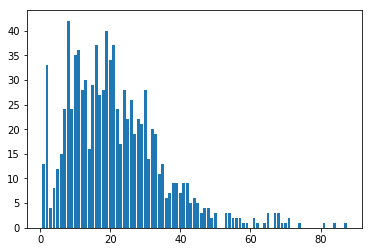

In [7]:
def show_distribution(counter):
#     labels, values = zip(*counter.items())

#     indexes = np.arange(len(labels))
#     width = 1

#     plt.bar(indexes, values, width)
    plt.bar(list(counter.keys()), list(counter.values()))
    plt.show()
show_distribution(counter)

In [8]:
def get_sentences_of_length(directory, min_length=0, max_length=1000):
    sentence_length = []
    for file in os.listdir(directory):
        with open(os.path.join(directory,file),'r') as f:
            text = f.read()
            doc = nlp(text)
            for i, sentence in enumerate(doc.sentences):
                sentence_length.append(len(sentence.tokens))
                if len(sentence.tokens) >= min_length and len(sentence.tokens) < max_length:
                    print('\n-----\n')
                    print(*[token.text for token in sentence.tokens])

In [9]:
get_sentences_of_length(CV_PAPER_DIR, 1,2)


-----

INTRODUCTION

-----

PEAKS

-----

271

-----

'I

-----

8

-----

'I

-----

I

-----

'

-----

/

-----

'

-----

I

-----

)

-----

\

-----

I

-----

\

-----

--.----r

-----

,

-----

'I

-----

....

-----

....

-----

TIME

-----

t

-----

272

-----

v

-----

273

-----

274

-----

=>

-----

-----..'t-

-----

@

-----

=

-----

A

-----

@

-----

:

-----

V

-----

:

-----

j

-----

\

-----

t

-----

_________

-----

~,_2__----

-----

@

-----

\.

-----

275

-----

276

-----

...

-----

..../

-----

-',

-----

\....

-----

..

-----

'

-----

....

-----

.......

-----

..?.:....

-----

....

-----

?????

-----

???.

-----

P

-----

2

-----

___.;.J

-----

277

-----

CONCLUSIONS

-----

REFERENCES

-----

20375-5000

-----

INTRODUCTION

-----

@

-----

302

-----

303

-----

+

-----

=

-----

304

-----

305

-----

-

-----

306

-----

and

-----

'

-----

or

-----

307

-----

DISCUSSION

-----

308

-----

REFERENCES

---


-----

ABSTRACT

-----

INTRODUCTION

-----

@

-----

378

-----

.

-----

"

-----

.....

-----

..

-----

'.

-----

'

-----

......

-----

Figure

-----

The

-----

379

-----

380

-----

'

-----

.a:..J

-----

~

-----

~

-----

~.

-----

(

-----

i

-----

?

-----

'

-----

.r

-----

I

-----

Fig.

-----

381

-----

382

-----

383

-----

laser

-----

~---,t+

-----

-

-----

PB

-----

Xtal

-----

PM

-----

Figure

-----

384

-----

385

-----

-~t

-----

-~t

-----

-~t

-----

2

-----

T

-----

-

-----

??

-----

+.+

-----

Y

-----

1

-----

3

-----

2

-----

4

-----

Figure

-----

...

-----

1'1

-----

j

-----

Ia.

-----

!

-----

l

-----

t

-----

0

-----

~

-----

W

-----

Figure

-----

Fig.

-----

386

-----

CONCLUSION

-----

ACKNOWLEDGEMENTS

-----

REFERENCES

-----

4

-----

53

-----

Wij

-----

Vj

-----

denotes

-----

54

-----

55

-----

E

-----

where

-----

oj

-----

and

-----

6

-----

Let

-----

tj

--

We see that the sentences that seem to be longer is because the tokenizer recognises symbols such as (, $ and ) as standalone tokens. This might cause these sentences to appear longer than they seem to be and can affect our comparisons with datasets of other domains.

In [10]:
# get_sentences_of_length(22,30)

TypeError: listdir: path should be string, bytes, os.PathLike or None, not int

As we mentioned before, special symbols including " get considered as an individual token. Here, we also see that words such as "doesn't" gets split into 2 tokens instead of one.

### 2.1 Comparing All Datasets
Now we try to parse and analyze the other 2 domain datasets.

Checking: food_reviews_scraping
Counter({8: 42, 19: 40, 16: 37, 21: 37, 11: 36, 10: 35, 20: 34, 2: 33, 13: 30, 15: 29, 18: 28, 30: 28, 12: 28, 24: 28, 17: 27, 26: 26, 9: 24, 22: 24, 7: 24, 28: 22, 25: 22, 29: 21, 32: 20, 33: 19, 27: 19, 23: 17, 14: 16, 6: 15, 31: 14, 35: 13, 1: 13, 5: 12, 34: 11, 42: 9, 39: 9, 38: 9, 41: 9, 4: 8, 37: 7, 40: 7, 44: 6, 36: 6, 43: 5, 45: 5, 3: 4, 48: 4, 47: 4, 67: 3, 53: 3, 68: 3, 54: 3, 50: 3, 65: 3, 46: 3, 71: 2, 49: 2, 55: 2, 57: 2, 61: 2, 56: 2, 59: 1, 58: 1, 64: 1, 87: 1, 70: 1, 81: 1, 74: 1, 62: 1, 84: 1, 69: 1})


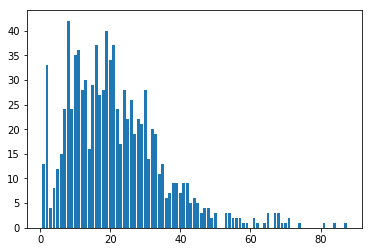

Checking: Deep Learning and Computer Vision papers
Counter({1: 1219, 2: 497, 3: 336, 4: 158, 5: 155, 12: 150, 15: 141, 20: 134, 18: 129, 6: 128, 16: 123, 8: 122, 7: 121, 19: 120, 21: 120, 13: 119, 10: 118, 14: 117, 17: 113, 9: 110, 24: 108, 22: 108, 11: 105, 25: 100, 23: 97, 26: 90, 30: 76, 27: 73, 32: 65, 28: 60, 31: 59, 29: 55, 35: 52, 37: 45, 33: 45, 36: 44, 34: 38, 38: 29, 39: 26, 40: 25, 44: 20, 43: 19, 45: 18, 42: 18, 41: 17, 49: 17, 50: 16, 48: 14, 46: 13, 53: 13, 47: 13, 52: 12, 55: 8, 62: 8, 54: 7, 51: 6, 63: 4, 61: 4, 58: 4, 65: 4, 56: 4, 59: 3, 57: 3, 69: 3, 68: 3, 70: 2, 77: 2, 60: 2, 93: 2, 79: 2, 71: 1, 81: 1, 89: 1, 88: 1, 84: 1, 107: 1, 95: 1, 66: 1, 92: 1, 64: 1, 117: 1, 116: 1, 168: 1, 76: 1, 102: 1, 75: 1, 101: 1, 85: 1, 72: 1, 143: 1, 78: 1})


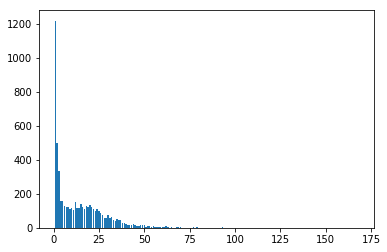

Checking: darren_documents
Counter({1: 4823, 2: 2214, 6: 1808, 7: 1778, 10: 1773, 13: 1772, 12: 1755, 11: 1744, 9: 1737, 15: 1735, 8: 1704, 3: 1685, 14: 1668, 5: 1597, 16: 1583, 4: 1515, 17: 1438, 18: 1435, 19: 1226, 20: 1199, 21: 1115, 22: 939, 23: 884, 24: 846, 25: 684, 26: 659, 27: 630, 28: 563, 29: 454, 30: 435, 32: 368, 31: 368, 33: 361, 34: 297, 35: 226, 36: 205, 37: 187, 38: 162, 40: 160, 39: 160, 41: 143, 44: 127, 43: 116, 42: 114, 46: 87, 45: 84, 49: 75, 47: 63, 48: 58, 50: 51, 51: 49, 53: 36, 57: 34, 56: 32, 52: 29, 54: 28, 55: 28, 59: 25, 58: 17, 63: 16, 62: 14, 68: 13, 67: 12, 65: 12, 66: 11, 61: 10, 69: 9, 75: 9, 77: 9, 60: 9, 64: 9, 72: 8, 104: 8, 73: 7, 71: 6, 70: 6, 87: 6, 79: 5, 85: 5, 84: 5, 107: 4, 76: 4, 93: 4, 88: 4, 97: 4, 103: 4, 110: 4, 91: 3, 106: 3, 74: 3, 100: 3, 89: 3, 86: 3, 131: 3, 102: 3, 153: 2, 148: 2, 114: 2, 121: 2, 120: 2, 174: 2, 80: 2, 113: 2, 94: 2, 101: 2, 105: 2, 108: 2, 239: 2, 212: 2, 134: 2, 109: 2, 90: 2, 213: 1, 118: 1, 117: 1, 152: 1, 99: 

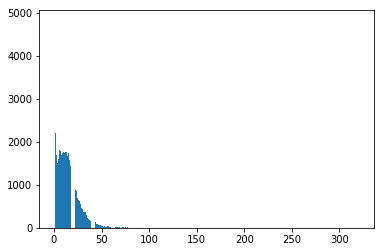

In [11]:
for dataset_dir in [FOOD_REV_DIR, CV_PAPER_DIR, GAME_DIR]:
    count = segment_sentences(dataset_dir)
    print(count)
    show_distribution(count)

### 3.1 Analysing Outliers
We see that there are numerous sentences that seem to have an absurd number of tokens in them. We will need to take a closer look to see if they are reliable or whether they should be seen as outliers.

In [12]:
get_sentences_of_length(GAME_DIR, 200)


-----

|~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~| | - Table of Contents ..................... CT.TS | | - Walkthrough ........................... 01.00 | | - Prologue......................... 01.01 | | - Silent Hill ...................... 01.02 | | - Getting to School ................ 01.03 | | - Midwich Elementary School........ 01.04 | | - Alternate School................. 01.05 | | - Silent Hill ...................... 01.06 | | - Alchemilla Hospital.............. 01.07 | | - Alternate Hospital............... 01.08 | | - Silent Hill ...................... 01.09 | | - Alternate Silent Hill ............ 01.10 | | - Silent Hill ...................... 01.11 | | - Sewers ........................... 01.12 | | - Silent Hill ...................... 01.13 | | - Kaufmann Sidequest ............... 01.14 | | - Alternate Silent Hill ............ 01.15 | | - Sewers PArt II ................... 01.16 | | - Amusement Park ................... 01.17 | | - Nowhere ...


-----

Characters ..........................................................( 01000 ) i - Characters ....................................................( 01001 ) 2 . Full Walkthrough ....................................................( 00000 ) i - Silent Hill ...................................................( 00001 ) ii - Wood Side Apartment ..........................................( 00002 ) iii - Blue Creek Apartment ........................................( 00003 ) iv - Silent Hill .................................................. ( 00004 ) v - Brookhaven Hospital ...........................................( 00005 ) vi - Alternate Hospital ...........................................( 00006 ) vii - Silent Hill .................................................( 00007 ) viii - Silent Hill Historical Society ............................. ( 00008 ) ix - Labyrinth .................................................... ( 00009 ) x - Lakeview Hotel ......................................

______________________ | | | || | |28 | | |31 | | | | | 101 | | 102 | | | | | | | | | | || | |___| |_____|___|____| | | |__________||__________| | | |29 | ______| | | | || | | | | | | | | | | || | |___|___|_____| | | | | | 103 || 104 | _________________ |27 | |30 | | | | | | || | | | | !@ | | | | | | | |__________||__________| | $ = | | | |_____| |______| | | | | | | | | | | _____ |33 | | | | | | | | Lobby | | | |32 | _ | | | | | 105 | | 106 | | | | ___| | | | | | | || | | |___|_|26 | | | | | | |__________||__________| | ___ |23 | | | | |_ _____| | | | || | | |___| | |_|___| | | |34 | | | | || | | |___| |___|25 | |______| | | | | | 107 | | 108 | | |___| | 24 | | | |||| | |_____| | | | || |___| |___| | | | |------| |35 | | | |__________||_________|_||_| |___| | | YZ | |_||||_| | | | | | ||11 |12 |_||_| |___| |___|_____|

-----

4 - Kitchen | | 5 - Electrical Room 6 - Elevator | | 7 - Elevator 8 - Store Room | | 9 - Pump Room 10 - Boiler Room | | 11 - Women 's Washroom 12 - Men's Washroo

In [13]:
get_sentences_of_length(GAME_DIR, 1,4)


-----

/|__|____/\___ >___|

-----

____________________________________________________________________________

-----

|~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~|

-----

|____________________________________________________________________________|

-----

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-----

____________________________________________________________________________

-----

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-----

----------------------------------------------------

-----

01.01

-----

--+ ____________________________________________________________________________

-----

|~~~~~~~~~~~~~~~~~~~~~~~|~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~|

-----

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-----

____________________________________________________________________________

-----

~~~~~~~~~~~~~~~~~~~~~~~~~~~~


-----

'

-----

'

-----

+====================================================+

-----

Version 3.0

-----

10/07/08

-----

+====================================================+

-----

Again !

-----

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

-----

TABLE OF CONTENTS

-----

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

-----

1 . )

-----

2 . )

-----

4 . )

-----

Weaponry

-----

5 . )

-----

6 . )

-----

Conclusion

-----

7 . )

-----

Contact

-----

8 . )

-----

Version History

-----

9 . )

-----

Afterword

-----

Press Ctrl +

-----

++++++++++++++++

-----

++++++++++++++++

-----

++++++++++++++++

-----

'

-----

++++++++++++++++

-----

++++++++++++++++

-----

===

-----

Whereas Pyramid

-----

===

-----

===

-----

Does

-----

===

-----

by Wandering

-----

One

-----

note :

-----

Why ?

-----

THE BUTCHER !

-----

Travis ' dark

-----

++++++++++++++++

-----

++++++++++++++++

-----

===

-----

===

-----

===

-----

===

-----

++++++++++++++++

-----

+++++++++++


-----

-------------------------------------------------------------------------------

-----

-------------------------------------------------------------------------------

-----

----------------------

-----

01/26/09

-----

------------------------

-----

-------------------------------------------------------------------------------

-----

-------------------------------------------------------------------------------

-----

-

-----

--------

-----

-------------------------------------------------------------------------------

-----

TABLE OF CONTENTS

-----

-------------------------------------------------------------------------------

-----

Section

-----

_______________________________________________________________________________ ///////////////////////////////////////////////////////////////////////////////

-----

I ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-----


-----

- Berserker

-----


-----

After all ...

-----

-- Extra Info

-----

+

-----

h

Achievement unlocked :

-----

->

-----

Go figure .

-----

Step inside .

-----

Objective Update :

-----

Objective Update :

-----

-----

-----

Achievement unlocked :

-----

->

-----

Choice Set 1

-----

-----

-----

Achievement unlocked :

-----

->

-----

Saved Wheeler -----

-----

==

-----

Save Room ==

-----

SAVE POINT !!

-----

++

-----

Quick Solution :

-----

Inner Circle :

-----

++

-----

~~~~~

-----

-----

-----

Achievement unlocked :

-----

->

-----

-----

-----

Achievement unlocked :

-----

->

-----

-----

-----

If Alex

-----

The Smile !

-----

-----

-----

Achievement unlocked :

-----

->

-----

Achieved Ending

-----

1 -----

-----

Alex costume

-----


-----

ENDING 2 ========

-----

If Alex

-----

Wheeler

-----

-----

-----

Achievement unlocked :

-----

Achieved Ending

-----

2 -----

-----


-----

ENDING 3 ========

-----

If Alex

-----

Wheeler

-----

-----

-----

Achievement unlocked :

-----

Achieved Ending

-----


_______________________________________________________________________________ ///////////////////////////////////////////////////////////////////////////////

-----

VII

-----

*******************************************************************************

-----

*******************************************************************************

-----

*******************************************************************************

-----

*******************************************************************************

-----

*******************************************************************************

-----

Version

-----

Version

-----

Version

-----

http://faqs.ign.com/articles/941/941068p1.html

-----

*******************************************************************************

-----

*******************************************************************************

-----

http://club.ign.com/b/about?username=berserker_kev&which=boards

-----

****************************


-----

************************************************************************

-----

------------------------------------------------------------------------

-----

------------------------------------------------------------------------

-----

************************************************************************

-----

Minesweeper1@hotmail.com

-----

************************************************************************

-----

------------------------------------------------------------------------

-----

|_|\__\___|_|

-----

|_|\__|___/

-----


-----

3 . Storyline

-----

4 . Characters

-----

6 .

-----

Modes

-----

9 . Rankings

-----

15 . Conclusion

-----


-----

------------------------------------------------------------------------

-----


-----

------------------------------------------------------------------------

-----

Introduction

-----

------------------------------------------------------------------------

-----

---------------------------

READING ROOM

-----

KITCHEN

-----

EMPLOYEE BASEMENT CORRIDOR

-----

FIERY STAIRWELL

-----

EMPLOYEE STAIRWELL

-----

EAST EMPLOYEE CORRIDOR

-----

OUTSIDE HALL

-----

OUTSIDE ROOM

-----

LOBBY

-----

------------------------------------------------------------------------

-----


-----


-----


-----

SHOTGUN STRATEGY

-----


-----

YAY !

-----

**************

-----

RIFLE STRATEGY

-----

**************

-----

****************

-----

HANDGUN STRATEGY

-----

****************

-----


-----


-----

------------------------------------------------------------------------

-----

CONVERSATION HALLWAY

-----

LONG STAIRWELL

-----

ROOF

-----

------------------------------------------------------------------------

-----


-----


-----

DIFFICULTY : MEDIUM

-----

************

-----

HANDGUN TIPS ************

-----

**********

-----

RIFLE TIPS **********

-----

-----

-----

-----

-----

************

-----

SHOTGUN TIPS ************

-----

-----

-----

YAY !



-----

OK .

-----


-----

LAVE VIEW HOTEL

-----


-----

The Cinderella

-----


-----


-----

Weird ...

-----

SAVE !

-----

SAVE !!

-----

SAVE !!!

-----


-----


-----


-----

SHOTGUN STRATEGY

-----


-----

YAY !

-----


-----

SHOTGUN STRATEGY

-----


-----

**************

-----

RIFLE STRATEGY

-----

**************

-----


-----


-----


-----


-----

DIFFICULTY : MEDIUM

-----


-----

HANDGUN TIPS

-----


-----

**********

-----

RIFLE TIPS **********

-----


-----

SHOTGUN TIPS

-----


-----

***********************

-----

***********************

-----


-----

------------------------------------------------------------------------

-----

------------------------------------------------------------------------

-----


-----


-----

ENTERING TOWN

-----


-----

Head through .

-----


-----

WOODSIDE APARTMENTS

-----


-----

Run there .

-----

Grab it .

-----

Outside .

-----


-----

BLUE CREEK APARTMENTS

-----


-----

Head out .

-----

Si


-----

************************************************************************

-----

------------------------------------------------------------------------

-----

------------------------------------------------------------------------

-----

************************************************************************

-----

Minesweeper1@hotmail.com

-----

************************************************************************

-----

------------------------------------------------------------------------

-----

|_|\__\___|_|

-----

|_|\__|___/

-----


-----

3 . Storyline

-----

4 . Characters

-----

6 .

-----

Modes

-----

9 . Rankings

-----

15 . Conclusion

-----


-----

------------------------------------------------------------------------

-----


-----

------------------------------------------------------------------------

-----

Introduction

-----

------------------------------------------------------------------------

-----

---------------------------

KEY

-----


-----


-----

EXAM ROOM KEY

-----


-----


-----

BE NT NEEDLE

-----


-----


-----

SHOTGUN =======

-----


-----

LAPIS EYE KEY

-----


-----


-----

SHOTGUN SHELLS

-----


-----

======== ROOF KEY

-----


-----

====

-----

HAIR ====

-----


-----

ELEVATOR KEY

-----


-----

------------------------------------------------------------------------

-----

DARK BROOKHAVEN HOSPITAL

-----

------------------------------------------------------------------------

-----


-----

AMPOULE =======

-----


-----

DRY CELL BATTERY

-----


-----


-----

BASEMENT STOREROOM

-----

KEY

-----


-----


-----

COPPER RING

-----


-----

========= LEAD RING

-----


-----


-----

HOSPITAL LOBBY

-----

KEY

-----


-----

------------------------------------------------------------------------

-----

------------------------------------------------------------------------

-----


-----

WRENCH ======

-----


-----

OLD BRONZE KEY

-----


-----

-----------------

THANKS TO :

-----

CVXFREAK

-----

FireEmblemPride@hotmail.com

-----

Message Boards .

-----

----------------------------------------------

-----

Message Boards .

-----

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

-----

HOSTING POLICY :

-----

cubed.biohazardextreme.com

-----

www.a2zcheats.com

-----

www.cheats.de www.psxcodez.com www.meristation.net

-----

--- CVXFREAK

-----

FireEmblemPride@hotmail.com

-----

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

-----

^

-----

|_|¯|_| _______________________________________________________________________________

-----

Cheatmasters.com

-----

'

-----

_______________________________________________________________________________

-----

_____|___/_____________|_|_|_________|___/____________________

-----

..-´¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯`-..

-----

``-.______________________________________________________________.-´´

-----

¯¯


``-.___________________________________________________[SH-COL]___.-´´

-----

¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯

-----

Enjoy .

-----

o Robbie

-----

o UFO

-----

o Circle Emblem

-----

o Alien Toy

-----

o Aglaophotis

-----

o Hyper Blaster

-----

o Radio

-----

o Canvas Sack

-----

o Toy Van

-----

_____|___/_____________|_|_|_________|___/____________________

-----

..-´¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯`-..

-----

``-.___________________________________________________[SH-TPH]___.-´´

-----

¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯

-----

Rain Maker

-----

|_______________________________________|

-----

________________|______________________________________________________________

-----

¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯

-----

|______________________________|

-----

________________|_______________________________________________________


-----


-----


-----

Chapters

-----

2 . Updates

-----

3 . Introduction

-----

12 . Credits

-----

GameFAQs - www.gamefaqs.com

-----

DanBirlew.com

-----

- www.danbirlew.com

-----


-----

2 . Updates

-----


-----

January ,

-----


-----

3 . Introduction

-----


-----


-----


-----

Eeeuuggh !!!! )

-----

Nice plan .

-----

Samael .

-----


-----


-----

Misty Silent

-----

And Dark Silent

-----

Since

-----

How ?

-----

No problem .

-----


-----


-----

Thus ,

-----

So how does

-----


-----


-----

Harry encounters

-----

To continue investigating

-----

Smart man .

-----


-----


-----

Simple .

-----

Thus ,

-----

Kaufmann .

-----

Kaufmann .

-----

Kaufmann .

-----


-----


-----

Cybil follows

-----

Perhaps .

-----

1 .

-----

2 .

-----

3 .

-----

4 .

-----


-----


-----

THE BAD ENDING

-----

THE GOOD ENDING

-----

Harry runs .

-----

Very humorous !!!

-----

1 .

-----

5 .

-----

6 .

-----

7 .

-----

1 .

-----




-----

-----------------------------------------------

-----

Kaufmann :

-----

Kaufmann :

-----

Harry :

-----

Kaufmann :

-----

No .

-----

-------------------------------------------------

-----

MICHAEL KAUFMANN

-----

-------------------------------------------------

-----

Kaufmann enters .

-----

Kaufmann :

-----

Harry :

-----

Kaufmann :

-----

Harry :

-----

Okay ,

-----

Kaufmann :

-----

-----------------------------------------------------------

-----

-------------------------------------------------------------

-----

Cybil :

-----

Cybil :

-----

Never mind .

-----

Harry :

-----

Harry :

-----

Cybil :

-----

Harry :

-----

Harry :

-----

Cybil :

-----

Dahlia :

-----

Dahlia :

-----

Harry :

-----

Dahlia :

-----

Stop it !

-----

STOP IT !

-----

Harry :

-----

Dahlia :

-----

Cybil :

-----

Dahlia :

-----

Harry :

-----

Use what ?

-----

Dahlia :

-----

The Flauros !

-----

Harry :

-----

---------------------------------


-----

_______________________________

-----

_______________________________

-----

1 .

-----

UPDATES 2 .

-----

FREQUENTLY ASKED QUESTIONS

-----

3 . MEMOS

-----

4 . CREDITS

-----

_______________________________

-----

--------------------------------------------------------------------------

-----


-----

S

-----


-----

--------------------------------------------------------------------------

-----

-------------------------------------------------------------------------

-----


-----

S

-----


-----

-------------------------------------------------------------------------

-----

-------------------------------------------------------------------------

-----


-----


-----

-------------------------------------------------------------------------

-----

==--==--=--==--==

-----

Table of Contents

-----

==--==--=--==--==

-----

Item Memos ----------

-----

Tape Transcripts

-----

----------------

-----

Cassette Tape

-----

==--=-====---==----==---=


-----

Version 1.1

-----

Modified :

-----

By : Ghidrah

-----

Submitted :

-----

EMaul : Ghidrah_@hotmail.com

-----

-----------------------------------------------------------------------

-----

MENU

-----

1 . Introduction

-----

2 . Insights

-----

3 . Controller

-----

4 . Contractions

-----

5 . Amendments

-----

6 . Walkthrough

-----

7 . Comments

-----

-----------------------------------------------------------------------

-----

1 .

-----

Introduction

-----

Maybe

-----

-----------------------------------------------------------------------

-----

2 . INSIGHTS

-----

1 .

-----

2 .

-----

3 .

-----

4 .

-----

6 .

-----

7 .

-----

8 .

-----

9 .

-----

10 .

-----

-----------------------------------------------------------------------

-----

3 .

-----

CONTROLLER

-----

Brightness

-----

1 -

-----

-----------------------------------------------------------------------

-----

4 . CONTRACTIONS

-----

------------------------------------


-----

***********************************************************************

-----

|+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|

-----

|+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|

-----

***********************************************************************

-----

/////////////////////////////////////////////////////////////////////// +=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

-----

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+ ///////////////////////////////////////////////////////////////////////

-----

1 . Introduction

-----

7 .

-----

9 . Conclusion

-----

/////////////////////////////////////////////////////////////////////// +=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

-----

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+ ///////////////////////////////////////////////////////////////////////

-----

////


-----

Steel Pipe

-----

Katana

-----

Part

-----

Part

-----

Hard IV -d.

-----

Hard IV -e.

-----

Block Head Shirt

-----

Killer Rabbit Shirt

-----

Onsen Shirt

-----

Play Shirt

-----

IGN .

-----

13eme Rue Shirt

-----

Conclusion and Farewell

-----

I - a.

-----

The Players

-----

Douglas

-----

Claudia

-----

Closers

-----

Since

-----

Double Heads

-----

Insane Cancers

-----

Numb Bodies

-----

Scrapers

-----

Slurpers

-----

Knife

-----

Steel Pipe

-----

Maul

-----

Katana

-----

Stun Gun

-----

Handgun

-----

Shotgun

-----

I -d.

-----

The Good Stuff

-----

Beam Saber

-----

Flamethrower

-----

Heather Beam

-----

Sexy Beam

-----

Health Drink

-----

First Aid Kit

-----

Ampoule

-----

Beef Jerky

-----

Handgun Bullets Handgun

-----

handgun .

-----

Shotgun Shells Shotgun

-----

Submachine Gun Clip

-----

Luckily

-----

Combat Tips

-----

CONSERVATION

-----

II .

-----

Lakeside Amusement Park

-----

Go inside .

-----



Most of the sentences that are high in token count but singly-counted seem to be caused by the scraping methods of the data. In this case, we can consider these as outliers and reprocess our data.

Checking: food_reviews_scraping
Counter({8: 42, 19: 40, 16: 37, 21: 37, 11: 36, 10: 35, 20: 34, 13: 30, 15: 29, 18: 28, 30: 28, 12: 28, 24: 28, 17: 27, 26: 26, 9: 24, 22: 24, 7: 24, 28: 22, 25: 22, 29: 21, 32: 20, 33: 19, 27: 19, 23: 17, 14: 16, 31: 14, 6: 14, 35: 13, 5: 11, 34: 11, 42: 9, 39: 9, 38: 9, 41: 9, 37: 7, 40: 7, 44: 6, 36: 6})


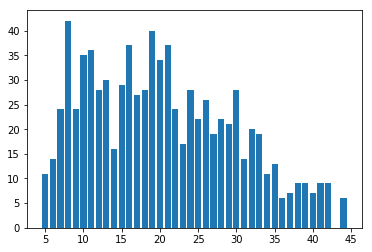

Checking: Deep Learning and Computer Vision papers
Counter({12: 144, 15: 137, 20: 134, 18: 127, 21: 120, 16: 120, 19: 119, 14: 116, 17: 113, 13: 109, 22: 108, 24: 107, 10: 106, 25: 100, 9: 98, 23: 96, 11: 94, 8: 94, 7: 91, 26: 90, 6: 87, 5: 82, 30: 75, 27: 73, 32: 65, 28: 60, 31: 59, 29: 55, 35: 52, 4: 52, 3: 50, 37: 45, 33: 45, 36: 43, 34: 38, 38: 29, 39: 26, 40: 25, 44: 20, 43: 19, 45: 18, 41: 17, 49: 17, 42: 17, 50: 16, 48: 13, 46: 13, 53: 13, 47: 13, 52: 12, 55: 8, 62: 8, 54: 7, 51: 6})


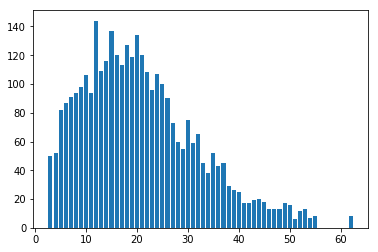

Checking: darren_documents
Counter({13: 1763, 10: 1750, 12: 1737, 11: 1725, 9: 1718, 7: 1703, 15: 1703, 8: 1677, 14: 1654, 6: 1577, 16: 1563, 18: 1434, 17: 1434, 5: 1318, 19: 1225, 20: 1186, 21: 1113, 22: 933, 23: 879, 24: 840, 4: 770, 25: 676, 26: 654, 27: 622, 28: 559, 29: 448, 30: 432, 31: 366, 32: 362, 33: 358, 3: 340, 34: 296, 35: 225, 36: 202, 37: 187, 38: 162, 40: 159, 39: 159, 41: 139, 44: 120, 42: 114, 43: 110, 46: 86, 45: 84, 49: 72, 47: 60, 48: 58, 50: 50, 51: 47, 53: 33, 57: 32, 56: 32, 54: 28, 52: 28, 55: 27, 59: 25, 58: 17, 63: 16, 62: 13, 68: 12, 65: 12, 67: 11, 66: 11, 61: 10, 69: 9, 77: 9, 60: 9, 64: 9, 75: 8, 72: 8, 73: 7, 71: 6, 70: 6, 104: 6})


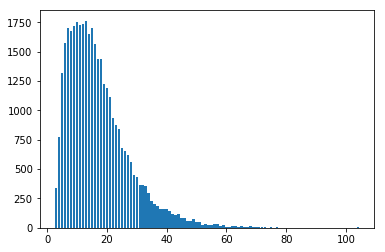

In [46]:
def has_three_words(tokens):
    count = 0
    for token in tokens:
        if token.text.isalpha():
            count += 1
    return count >= 3
        
def segment_sentences_without_outliers(directory):
    sentence_length = []
    print("Checking:",os.path.basename(directory))
    for file in os.listdir(directory):
        with open(os.path.join(directory,file),'r') as f:
            text = f.read()
            doc = nlp(text)
            for i, sentence in enumerate(doc.sentences):
                if len(sentence.tokens) > 1 and has_three_words(sentence.tokens):
                    sentence_length.append(len(sentence.tokens)) 
    counter = Counter(sentence_length)
    return Counter({k:v for k,v in counter.items() if v > 5})

counters = []

for dataset_dir in [FOOD_REV_DIR, CV_PAPER_DIR, GAME_DIR]:
    count = segment_sentences_without_outliers(dataset_dir)
    print(count)
    counters.append(count)
    show_distribution(count)

In [47]:
def get_mean_from_counter(counter):
    sum_of_numbers = sum(number*count for number, count in counter.items())
    count = sum(count for n, count in counter.items())
    print("Mean:", sum_of_numbers / count)
    print("Most Common:", [key for key, count in counter.most_common(3)])

print("Mean values for 3 datasets:")
for counter in counters:
    get_mean_from_counter(counter)

Mean values for 3 datasets:
Mean: 20.460620525059667
Most Common: [8, 19, 16]
Mean: 20.790061746545135
Most Common: [12, 15, 20]
Mean: 17.185373190449333
Most Common: [13, 10, 12]


In [48]:
def get_sentences_of_length_alpha_required(directory, min_length=0, max_length=1000):
    sentence_length = []
    for file in os.listdir(directory):
        with open(os.path.join(directory,file),'r') as f:
            text = f.read()
            doc = nlp(text)
            for i, sentence in enumerate(doc.sentences):
                sentence_length.append(len(sentence.tokens))
                if len(sentence.tokens) >= min_length and len(sentence.tokens) < max_length and has_three_words(sentence.tokens):
                    print('\n-----\n')
                    print(*[token.text for token in sentence.tokens])

In [50]:
get_sentences_of_length_alpha_required(CV_PAPER_DIR, 50)
get_sentences_of_length_alpha_required(GAME_DIR, 50)


-----

The above relation ( 1 ) is also valid for the correlogram trough during the falling phase of the EPSP , as long as del dt > if the EPSP falls more rapidly than the trough is limited at zero firing rate ( as illustrated for the correlogram at bottom ) .

-----

A monosynaptic connection from cell A to cell B would produce a first - order cross - correlation peak P1 ( BIA , t ) , representing the conditional probability that neuron B fires above chance at time t , given a spike in cell A at time t = O .

-----

A disynaptic link may be produced by two serial monosynaptic connections , from A to C and from C to B ( Fig. 2 , bottom left ) , or by a common synaptic input from C ending on both A and B ( Fig. 2 , bottom right ) .

-----

Feedforward parallel pathways are formed when cell A is monosynaptically connected to B and in addition has a serial disynaptic connection through C , as illustrated in Fig. 3 ( bottom left ) ; the correlational effects of the two linkages from A to 


-----

In monocular deprivation , for example , some cells remain responsive to the closed eye in spite of the very large shift of most cells to the open eye - Singer et. al. 5 found , using intracellular recording , that geniculo - cortical synapses on inhibitory interneurons are more resistant to monocular deprivation than are synapses on pyramidal cell dendrites .

-----

Recent work suggests that the density of inhibitory GABAergic synapses in kitten striate cortex is also unaffected by MD during the cortical period 6 , 7 . These results suggest that some LGN - cortical synapses modify rapidly , while others modify relatively slowly , with slow modification of some cortico - cortical synapses .

-----

[ 3 ] Cooper , L. N , Munro , P. W. & Scofield , C. L. ( 1985 ) in Synaptic Modification , Neuron Selectivity and Nervous System Organization , ed. C. Levy , J. A. Anderson & S. Lehmkuhle , ( Erlbaum Assoc . , N. J. ) .

-----

In pattern classification we wish to find the stored ve


-----

where ~ is the state of the neural network , a position vector in a high - dimensional space ; f ( ~ ) is a scalar energy , which can be imagined as the height of a landscape as a function of position ~ ; g(~ ) = 0 is a scalar equation describing a subspace of the state space .

-----

During constrained optimization , the state should be attracted to the subspace g ( ~ ) = 0 , then slide along the subspace until it reaches the locally smallest value of f ( ~ ) on g (~ ) = O. In section 2 of the paper , we describe classical methods of constrained optimization , such as the penalty method and Lagrange multipliers .

-----

Note that there is a auxiliary differential equation for A , which is an additional " neuron " necessary to apply the constraint g (~ ) = O. Also , recall that when the system is at a constrained extremum , VI = - AVg , hence , x. = O. Energies involving Lagrange multipliers , however , have critical points which tend to be saddle points .

-----

is positive


-----

After observing the first sample ( Xl , Yl ) E X x Y , Fa is reduced to Fi so that I ( xt ) = Yl for any I E F. After observing the second sample ( X2 ' Y2 ) E X x Y , Fl is further reduced to F2 so that i ( xt ) = Yl and I ( X2 ) = Y2 for any I E F .

-----

Algorithm 2 , At the initial stage , let So be composed of an arbitrary element in X x Y . For every i = 1 , 2 " " , let ii - lex ) for any x E X equal some y. such that ( x? , y.) E Si -l and d ( x , x ? ) =

-----

Then , measure the Euclidean distance 6 between fj and a black point B on x being the closest to B. Let d ( x , x ) be the summation of 6's for all black points B 's on x divided by the number of B 's . ?

-----

If the Fourier transforms r ( f ) = F{r ( t ) } , w ; ( f ) = F { W ; ( t ) } , Yj ( f ) = F { Yi ( t ) } , and aj ( f ) = F { ai ( t ) } exist , then Yi ( f )

-----

Let W ( k ) ( t ) = [ WI ( t ) ( k ) ( t ) where w/k ) ( t ) is the vector whose elements W ; ) t ) ( t ) are transfer functions to th


-----

The authors would like to thank John Lambe for his invaluable suggestions , T . Duong for his assistance in the breadboard hardware development , J. Lamb and S. Thakoor for their help in the thin film resistor deposition , and R. Nixon and S. Chang for their assistance in the chip layout design .

-----

Khanna , MRS Proc. 95 , 627 ( 1987 ) W. Hubbard , D. Schwartz , J. Denker , H.P. Graf , R. Howard , L. Jackel , B. Straughn , and D. Tennant , AIP Conf. Proc. 151 , 227 ( 1986 ) M.A. Sivilotti , M.R. Emerling , and C. Mead , AIP Conf. Proc. 151 , 408 ( 1986 ) J.P. Sage , K. Thompson , and R.S. Withers , AIP Conf. Proc. 151 ,

-----

|~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~| | - Table of Contents ..................... CT.TS | | - Walkthrough ........................... 01.00 | | - Prologue......................... 01.01 | | - Silent Hill ...................... 01.02 | | - Getting to School ................ 01.03 | | - Midwich Elementary Schoo

Inside the house on Levin Street || |_| || ||------------------------||-----------------------------------------|| _ || || FIRST AID KIT || School - Infirmary on first floor || |_| || ||------------------------||-----------------------------------------|| _ || || FIRST AID KIT || School - Library on second floor || |_| || ||------------------------||-----------------------------------------|| _ || || FIRST AID KIT || Alt. School -

-----

Fan room on first floor || |_| || ||------------------------||-----------------------------------------|| _ || || FIRST AID KIT || Alt. School - Infirmary first floor || |_| || ||------------------------||-----------------------------------------|| _ || || FIRST AID KIT || Alt. School - Library Reserve 2F || |_| || ||------------------------||-----------------------------------------|| _ || || FIRST AID KIT || East of Ellroy and Block intersection || |_| || ||------------------------||-----------------------------------------|| _ || || FIRST AID KIT |


-----

2.3 ) Travis Grady : Serial Killer ( Second Ending ) 2.31 ) Women / Mirrors 2.32 ) Evidence 2.4 ) Travis Grady : Innocent ( First Ending ) 2.41 ) Women / Mirrors 2.42 ) Astral Projection : Reason to the Madness of Silent Hill 2.43 ) Evidence 2.44 ) The Good Ending 3 . )

-----

This ( and the fact that he runs into a burning house to save a random person , who turns out to be Alessa ) shows us that in order for Travis to be a serial killer , he does it involuntarily , with no memory of it whatsoever .

-----

* Updated Note : Given his behavioral patterns and personality coupled with the trauma he sustained as a child , it is very likely Travis suffers from a mild case of Complex Post Traumatic Stress Disorder ( or , if one wants to be generic , PTSD ) in addition to being psychosomatic .

-----

" Varied changes in the perception of the perpetrator ... " one can see as being the way Travis sees his mother , still seeing her as his mother despite what she tried to do , then bei

* NOTE : It may represent Travis as an adult ; a mental monstrosity ( due to childhood trauma ) , but ( like Caliban of ' The Tempest ' ) can be considered the only true human in the town ( as Caliban was the only true human on the island in the play ) .

-----

* NOTE : suspended in a cage or , more accurately , a " gibbet " which was used centuries ago to suspend convicted criminals at the crossroads where their souls would be doomed to remain ( a superstitious belief that the criminal 's soul would n't return to town and exact its revenge for their execution )

-----

* NOTE : Memories of the Grady couple : both were suspended from the ceiling ( Helen Grady by a gibbet , Richard Grady by a rope ) which can be interpreted as their both being guilty of serious crimes ( Helen 's attempted murder of her son , Richard 's child endangerment through his suicide ) resulting in their demonic representations being hung like criminals .

-----

CONCLUSION TWO : Travis ( Innocent ) - In this co


-----

- Puzzle List . . . . . . . . . . . . . . . . . . . . . . . [ LI01 ] - Save Point List . . . . . . . . . . . . . . . . . . . . . [ LI02 ] - Weapon List . . . . . . . . . . . . . . . . . . . . . . . [ LI03 ] - Serum List . . . . . . . . . . . . . . . . . . . . . . . .

-----

- Move Alex Left Analog ( push ) [ LS ] - N /A Right Analog - Move Camera / Look around in first person view Right Analog ( push ) [ RS ] - First Person View / Zoom in When Map is Displayed Start - Display pause menu Back - N /A D-pad Up - Turn on / off Flashlight D-pad Down - N /A D-pad Left - Switch Current Weapon D-pad Right - Switch Current Weapon A ( double tap ) - Burst through door

-----

Max Ammo : 9/18 ( normal ) , 5/10 ( hard ) | Max Ammo : 12/24 ( normal ) , 7/14 ( hard ) Ammo Pickup : 9 ( normal ) , 5 ( hard ) | Ammo Pickup : 12 ( normal ) , 7 ( hard )

-----

Max Ammo : 4/18 ( normal ) , 3 / 6 ( hard ) | Max Ammo : 5 / 10 , ( normal ) 4 / 8 ( hard ) Ammo Pickup : 4 ( normal ) , 3 ( hard ) | Am


-----

.d8888 b. 8888888 888 8888888888 888 b 888 88888888888 d88P Y88 b 888 888 888 8888 b 888 888 Y88 b. 888 888 888 88888 b 888 888 " Y888 b. 888 888 8888888 888Y88 b 888 888 " Y88 b. 888 888 888 888 Y88b888 888 " 888 888 888 888 888 Y88888 888 Y88 b d88P 888 888 888 888 Y8888 888 " Y8888P " 8888888 88888888 8888888888 888 Y888 888

-----

------------------------------------------------------------------------ | R E S T L E S S D R E A M S | S A I G O N O U T A | | D I R E C T O R ' S C U T | I N N E R F E A R S | | G R E A T E S T H I T S |

-----

- at the Texxon Gas Station at the corner of Carroll and Nathan , you can find the STEEL PIPE , a new weapon , stuck in a car 's hood , a HEALTH DRINK and a box of HANDGUN BULLETS in front of a garage door , and two more HEALTH DRINKS and HANDGUN BULLETS in front of a parked van .

-----

Three bright coins in five holes be at one end sits the seducer of she the wind from behind , the woman doth play the formless one , null , lies furt

Although he seems to be helping Henry and Eileen , informing him of Walter 's plan , Eileen becoming possessed and that Walter must be killed ( all true of course ) , and he 's in a room that seems free from evil , pure white with loads of candles ( and an argument for a realm of Metatron intervention ) , this to me is all a facade .

-----

He was looking in his warehouse after losing a volleyball when a part - time staff employee rushed in to tell him that the manager of the pet store next door had been murdered , his heart removed and a crest carved into his back ( presumably this was Walter while he was still a High School student , and presumably a crest was carved into the backs of all the first ten victims , though we only hear about this one ) .

-----

[ Note : Miriam 's body was in a worse state than her brother , which would suggest that Walter perhaps acted out of inherant jealousy and hatred , attacking the female might symbolize the fact that he was deeply disturbed by th

First of all , if you try to mess with the life support system without blinding him you 'll automatically get smacked ( like I mentioned ) , but he also can raise his hand in the air and summon debris to it , then thorw the debris at you !

-----

It is fairly easy to hit Anne when she is busy interacting with the blue switches , especially if you ignore the enemies she releases , but this is also a enclosed hallway ( albeit a very long hallway ) so you can eventually corner her as well if you do n't let her slip around you , which is like herding her in a way .

-----

To the back of the store you will find the OLD COAT , which is what the homeless guy needs ( NOTE : In HARD PUZZLE MODE , the " Old Coat is in the storage room of the shop , past the door on the left and in the corner to the left .

-----

The prison in which this ingeniously gruesome device is utilized has decided to retire the machine , but the executioner that operates it seems to have an abnormal love for the elegan

Bronze |__ ¯¯¯'————————————.—————'¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯'— — — — — — — — — —— —'¯¯¯ Description | Completed " The Bank " side quest . — — — — — — — — — — — — — — — — | — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — —————————— How to Obtain | Complete " The Bank " side quest .

-----

Bronze |__ ¯¯¯'—— — — ————————.———————————'¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯'— — ————————— —'¯¯¯ Description | Completed the " Homeless " side quest . — — — — — — — — — — — — — — — — | — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — ————————— How to Obtain | Complete the " Homeless " side quest .

-----

Bronze |__ ¯¯¯'—— — — ————————.———————————'¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯'— — ————————— —'¯¯¯ Description | Completed the " Cinema Verite " side quest . — — — — — — — — — — — — — — — — | — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — — —


-----

I have created this guide partly because I have noticed that there are only a few FAQ / Walkthroughs for this game currently on GameFAQs , and because I wanted to help other people 's out there who are stuck in the confines of this cursed town and need help .

-----

CHAPTER I : OLD SILENT HILL CHAPTER II : MIDWICH ELEMENTARY CHAPTER III : ALTERNATE SCHOOL CHAPTER IV : CENTRAL SILENT HILL CHAPTER V : ALCHEMILLA HOSPITAL CHAPTER VI : ALTERNATE HOSPITAL CHAPTER VII : ALTERNATE CENTRAL SILENT HILL CHAPTER VIII : SEWAGE SYSTEM CHAPTER IX : LAKESIDE RESORT CHAPTER X : NOWHERE

-----

Finney - Jack Finney , author of " Time and Again " Bachman - Richard Bachman , Stephen King 's pseudonym Bloch - Robert Bloch , author of " Psycho " Matheson - Richard Matheson , author of " I am Legend " Ellroy - Jack Ellroy , author of the " Black Dahlia " Bradbury - Ray Bradbury , author of " Something Wicked This Way Comes " Levin - Ira Levin , author of " Rosemary 's Baby " Sanford - John Sanford 


-----

==---------------------------------------------------------------== || | | || S I L E N T H I L L 3 M E M O F A Q || || ------------------------------------------------------- || || © Copyright 2004 - 2019 by Andrew Haffenden aka Conquerer || | | || || Silent Hill is a registered trademark of Konami Computer || || Entertainment Tokyo , Inc. © 1999 2003 Konami Computer || || Entertainment Tokyo .

-----

All rights reserved . || || || ||====================---------=====---------====================|| || | | || Silent Hill 3 | | || || || Developer : KCET ( Team Silent ) || || Publisher : Konami || | | Original Platforms : PlayStation 2 / PC || || Genre : Adventure || | | Origin : Japan || || Number of Players : 1 | | || Initial Release Date : May 23rd , 2003 || || ESRB Rating : " M " for Mature || || || ||====================---------=====---------====================|| || | | || W A N T T O R A T E T H I S F A Q ? || | | || || If you feel that this FAQ has helped you in any way


-----

------------------------- | | P L O T A N A L Y S I S | | ------------------------- | | | | # # ### ## # ## ### | | # ## # ## / #### / # ### # ## | | /# / / # # # # / # ## ## # # | | / / / # # # # # # # | | / / # # # # # | | # # ## # ### # # # # | | # # ## # ### # # # # | | # # #### #### # # # # # # | | # # ## # # # # # # # | | # # ## # # # # # # # # | | # # # ## # # # # # # | | / # # # # # # # # | | / # # / # # ## # # # # | | / # # # ## # # ### / ### / # ## / | | / # # # # / ## / # # / | | # | | ## | | | =======================================================================

-----

Hill : Play Novel ( GBA ) | | Silent Hill 2 ( PS2 ) | | Silent Hill 2 : Restless Dreams ( PS2 , Xbox , PC ) | | Silent Hill 3 ( PS2 / PC ) | | | | Version 6.5 | | May 13 , 2007 | | E-mail : Orca782 [ at ] hotmail [ dot ] com ( Orca782 ) | | FireEmblemPride [ at ] gmail [ dot ] com ( cvxfreak ) | ***********************************************************************

-----

More chasms attempt to b

Continue to run to the left , past a ticket booth on your right and on either side of a short railing , until you hit the chain - link fence , then press the " L1 " and " R1 " buttons at the same time to perform a quick turn around .

-----

Follow the stairs ' twists and turns all the way to the top of the platform where you will find a deadly drop - off to your left , a control booth to your right , and a short gate leading to the track for the roller coaster straight ahead .

-----

Do so if you want to ( I suggest checking every single door , so that Heather will mark on her map whether they will open , or whether they are locked or jammed , so that you will know which doors are useful when you come back later ) , but I will tell you now that they are all jammed and there is nothing of use in the lockers and boxes in this hall .

-----

They are slow and easy to dodge , and you wo n't need to come back to this area again , so weave around them and take the door at the end of the ri

You are now on the other side of the long , narrow corridor , on the other side of the rubble from the area with the dead body under the rubble ( strangely enough , on the map , the staircase you just came down is labeled " to Platform 2 " , though we know it just leads back up to the other side of Platform

-----

this new enemy under controlled conditions ( resist the temptation to use your new Shotgun on the Cancer , as it is a waste of ammunition , and it is more scarce than Handgun Ammo ; use the Steel Pipe , if anything ) , but since you do n't need to go back up these stairs , you can avoid it entirely if you want to .

-----

So here is what you need to do ; walk past the door slightly to the east , and then turn back towards them , so you are facing towards them but angled so that you are facing west , away from the direction the train is coming in .

-----

The Double Heads stay closer to the north wall of the tracks , so jag briefly to the left , south - westward until you a

There is a shelf to the right of this as you are facing it that may or may not be empty ; if you have n't gotten the pass code from the back of the shelf in the basement , there will be a journal here from Stanley hinting at the code 's location , talking about how the crazy doctor hid it there .

-----

There is nothing but the elevator , a pile of rubble , and a jammed door if you continue to the east , so it is time to head back west and go through the door on the south wall , slightly west of the door leading to the stairwell .

-----

Locals have complained of the intermingled sounds of chanting and children crying at all hours , and there is a strange concrete cylinder on the premises that certainly has nothing to do with the care and feeding of runaways , but might be a prison or secret place of worship .

-----

Two of the Nurses appear in the eastern part of the hallway behind you , and one to the west , so put the one to the west between you and the others and kill it , then 

In the south - west corner of the room , on the floor next to some bookshelves are some drawings that Alessa did when she was little , and if you look at them , Heather will remember some things about her and Claudia playing together when they were both young .

-----

You have exhausted all of your options for exploration except for two ; the tarot - locked door leading to the final battle ( which you ca n't open yet ) and the locked door way back at the beginning of the Church , the door on the south wall in the hallway where the confessionals are located .

-----

This room is pertinent to the original Silent Hill for a couple of reasons : first of all , Harry visited it in two forms while searching for Cheryl ; once in its physical location in Midwich Elementary School , and again in the otherworldly amalgam maze at the end of his journey .

-----

The second interesting fact is that during his journey , Harry found a key in Midwich Elementary school that was the key to K. Gordon '

So the first stanza gives us the Wren ( 9 ) , second stanza leads us to the Owl ( 2 ) , the third stanza confuses the hell out of us and makes us angry but the process of elimination and the Encyclopedia Britannica gives us the Linnet ( 7 ) , and the fourth stanza leads us to the Sparrow ( 1 ) .

-----

The Fool goes in the top left - hand corner of the grid , The Moon goes in the top right - hand corner of the grid , The Eye of the Night goes in the direct center of the grid , The Hanged Man goes in the bottom left - hand corner of the grid , and The High Priestess goes in the bottom right - hand corner of the grid .

-----

It says he is " under the ground " , meaning the lowest level , the bottom row , and that " To his right ; to his left , there 's no one around " , meaning The Hanged Man is the only card on the lower level , right in the middle , with no other cards on the bottom row with it .

-----

They can not be in the middle row , since the Hanged Man is in the middle , and

It has been unclear as to whether or not Silent Hill has been abandoned for the last 17 years , whether the real city lives on , corrupted but without the monsters , or whether it has almost ceased to exist entirely , gradually fading from people 's memories like a bad dream .

-----

While in Silent Hill 3 we do visit West South Vale again , and go into Brookhaven Hospital and Lakeside Amusement Park again , as well as visit the Church ( which may or may not be the same building where Harry met Dahlia in the original Silent Hill ) and briefly stop by the Heaven 's Night club , that is it for the town itself .

-----

I would have loved to see her pick up a Baseball bat from the sporting goods store , a shovel from a home and garden center , or a butcher 's knife from the café while in the mall , and make her wait until the subway to come across a jagged piece of metal that she can use as a Steel Pipe .

-----

Furthermore , the previous Silent Hills had references both obvious and obl

You can easily get off the four shots before | | he can do anything , but the problem is that he will almost always hit you | | after that , even if you do n't reload you 'll still get shot trying to run . | | See if you can try hitting him from a close range , because his punch is | | extremely weak , and he 'll always do it when you get near him .

-----

Each door will now teleport | Health Drink ..........._____ | you to the location of a different door when | Rifle Shells ..........._____ | you go through it , the one you want to take | Rifle Shells ..........._____ | is Room 202 , at the very top on your right .

-----

Even with the mobility detriment , using the | | L1 and R1 buttons to strafe you can dodge their attacks almost every time , | | and the super powerful overhead swing will almost always hit since one of | | them is bound to step in front of you .

-----

She released a bunch of moths which chase after | | you and get in your hair , this deals an insignificant amou

-------------------------------------------------------------------o | | | LOCATIONS | | | | 1 - Shower Room 2 - Elevator | | 3 - Bath 4 - Rest Room | | 5 - Examining Room 2 6 - Pharmacy | | 7 - Store Room 8 - Visiting Room | | 9 - Reception Office 10 - Document Room | | 11 - Examination Room 12 - Doctor 's Lounge | | 13 - Examining Room 1 14 - Elevator | | 15 - Director 's Room 16 - Meeting Room | | 17 - Men's Washroom 18 - Women 's Washroom | | 19 - Cafeteria 20 - Kitchen | | 21 - Electrical Room 22 - Store Room | | 23 - Elevator 24 - Store Room | | 25 - Boiler Room 26 - Pump Room | | 27 - Elevator 28 - Shower Room | | 29 - Bath 3 30 - Examining Room 4 | | 31 - Rest Room 32 - Special Treatment Room | | 33 - Store Room 34 - Elevator | | 35 - Elevator Control Room 36 - Elevator | | 37 - Bath 2 38 - Examining Room 3 | | 39 - Rest Room 40 - Women 's Locker Room | | 41 - Nurse 's Station 42 - Men's Locker Room | | 43 - Linen Room 44 - Elevator | | | | ITEMS | | | | A - Map of Hospital B -

In [52]:
get_sentences_of_length_alpha_required(CV_PAPER_DIR, 2, 5)


-----

First - order correlation

-----

Second - order correlation

-----

t t t I

-----

t t t

-----

Common input loop

-----

f f dxl

-----

f f d XI

-----

Training Data Required

-----

Estimating the Entropy

-----

We generate many

-----

squares sense is

-----

0 Pi xe Is

-----

REFERENCES AND NOTES

-----

METHODS / PRELIMINARY RESULTS

-----

THE NEUROCOMPUTING MODEL

-----

r I I

-----

Central Nervous System

-----

Central Nervous System

-----

PORTABLE PARALLEL NEUROCOMpuTER

-----

EXTERNAL USER CONTROLLED PARAMETERS

-----

EXTERNALLY CONTROLLED AMPUFICATION

-----

OF N SIGNALS

-----

I --~ RESET SCANNING

-----

I j max

-----

OUTPUT SIGNAL In

-----

USER CONTROLLED PARAMETERS

-----

SINGLE NEURON PROCESSING

-----

where the mean field

-----

Afferent Signals d

-----

I - L J

-----

Why is this ?

-----

Sum of Products

-----

Input lines Feature 4

-----

Feedback connections may be

-----

Adaptive Connection Matrix

-----

Output through externa

In [55]:
get_sentences_of_length_alpha_required(GAME_DIR, 0, 10)


-----

| ITEM CHECKLIST | None ...........................................N/A | |_______________________|____________________________________________________|

-----

THE STORY SO FAR :

-----

This is where the game begins .

-----

From here there is no turning back .

-----

THE STORY SO FAR :

-----

With that he gets ready to go .

-----

The alley where you chased

-----

There are a couple things you should know .

-----

Head back through the gate and go north .

-----

The door is open so go inside .

-----

The Steel Pipe is a new melee weapon .

-----

Turn around and head back north .

-----

Head back up to Matheson and continue west .

-----

That saves a little time .

-----

Harry automatically turns on his flashlight .

-----

Examine the bloody notes behind the counter here .

-----

This is the infirmary .

-----

Save and leave here .

-----

Babies to be found in this hallway .

-----

Turn around and return to the previous room .

-----

Check out the room marked

I wonder if Eileen Galvin is okay .

-----

She has no idea what 's going on ...

-----

But she 's in danger nevertheless . "

-----

Maybe he had some cement handy ?

-----

She has no idea what 's going on ...

-----

But she 's in danger nevertheless . "

-----

You 're on your own on this one .

-----

" You 've seen that world as well ...

-----

That horrible nightmare .

-----

Do n't get lost in there .

-----

But there 's still hope .

-----

Then keep going down .

-----

To the deepest part of him .

-----

And look for the ultimate Truth . "

-----

That horrible nightmare . "

-----

Do n't get lost in there .

-----

He just wanted to let you know .

-----

Remember those doors you saw in each world ?

-----

- " Then keep going down .

-----

To the deepest part of him .

-----

And look for the ultimate Truth . "

-----

How innocent is Joseph , really ?

-----

It saved my life .

-----

Strike when the sword is energized !

-----

It 's extremely valuable . "

-----

Head down the hall to the auditorium .

-----

Go out the door with an exit sign .

-----

--- III.9 Streets Outside Toluca Mall

-----

Scale the fence and turn to your right .

-----

Snap a photo of it before you continue .

-----

Significant Objects : Ghost ( Dead Dog ) ***

-----

There 's a graphical glitch here too .

-----

--- III.9 Green Lion Pawn Shop

-----

Snap a photo of it .

-----

Approach the counter and interact with it .

-----

Turn around and walk out the door .

-----

Pick a door and go down the stairs .

-----

As you approach it you 'll transition again .

-----

This is the exit .

-----

This is the shortest path possible .

-----

It has a lamp above it .

-----

The door you came through vanishes .

-----

--- III.10 Hall of Glass

-----

However , the walls are invisible .

-----

This is the most difficult nightmare sequence .

-----

Here 's a diagram of the final corridor :

-----

SAVE YOUR GAME HERE .

-----

THIS SECTION CONTAINS MILD SPOILERS ***


-----

( Covers Xbox 360 release )

-----

Silent Hill : Homecoming FAQ / Walkthrough

-----

Version 1.3 Last updated :

-----

Authored by : Berserker Email : berserker_kev(at) yahoo.com

-----

This document Copyright 2008 - 2009

-----

Kevin Hall ( Berserker ) --------- --

-----

TABLE OF CONTENTS

-----

Alex has finally returned home from the service .

-----

" I miss your brother , Alex ... "

-----

Alex tells his mother ...

-----

RB - Weapon Wheel menu Left Analog

-----

FLASHLIGHT AND RADIO ********************

-----

The radio should stay on at all times .

-----

There is no reason to turn it off .

-----

o----------------------------------o | HEALING ITEM | HEALTH REPLENISH | |==================================|

-----

USING KEY ITEMS ***************

-----

This is usually the case for locked doors .

-----

BUTTON TAP SEQUENCES ********************

-----

Alex 's flashlight will highlight the closest enemy .

-----

Press the B button to perform a dodge .

---

Open the double doors ahead .

-----

Damn this hotel is dark .

-----

Return to the main corridor .

-----

What the hell is it with this kid ?

-----

_ STREETS OF SILENT HILL _

-----

Connect the cables as follows .

-----

Blue , R = Red ,

-----

[ ] Power has been restored .

-----

Use the elevator .

-----

Arm your handgun .

-----

A cutscene will play as the elevator rises .

-----

To The Point ( 10G )

-----

Well , ok , not really .

-----

A cutscene will play .

-----

Third Floor Hallway ==

-----

There seems to be something behind the painting .

-----

Cut it to find out what .

-----

Squeeze through the cut painting .

-----

Room 306 has a unique lock .

-----

Find a way to open it .

-----

Save your game at the !!

-----

on the wall .

-----

Y - Who are you ?

-----

X - How did you get here ?

-----

Y - Who left you here ?

-----

X - How did you get here ?

-----

Y - I ca n't help you .

-----

X - I want to help you .

-----

X - I want to help you .


A cutscene will trigger in the next room .

-----

== Gas Chamber ( OW ) ==

-----

Dodging is highly needed in this battle .

-----

You 'll gain an achievement after defeating Asphyxia .

-----

Catch Your Breath ( 50G )

-----

A cutscene will play after the battle .

-----

Open the next door .

-----

_ OTHERWORLD STREETS OF SILENT HILL _

-----

Run toward Josh up ahead .

-----

Run the way that Josh went .

-----

The only door up ahead is jammed .

-----

Continue ahead and shoot the Smog that attacks .

-----

Search the church for anything helpful .

-----

The pentagon can be examined again .

-----

Find the pieces missing from the five prongs .

-----

WARNING ( GAME BUG ALERT ) :

-----

WARNING ( GAME BUG ALERT 2 ) :

-----

Go to the East Wing .

-----

The evil of Silent Hill knows no bounds !

-----

Found ALL Photos -----

-----

can be seen on the wall directly ahead .

-----

There is someone inside !

-----

Save your game before talking with the person .

-----


Location : Otherworld Overlook Penitentiary / Hallway outside

-----

Location : Otherworld Overlook Penitentiary / Shower Area

-----

Location : Otherworld Overlook Penitentiary / Outside Corridor

-----

Location : Otherworld Church / East Wing

-----

Location : Lair / Torture Room

-----

Location : Lair / Room outside

-----

Founding Family Chamber

-----

Location : Alchemilla Hospital / Women 's Restroom

-----

Location : Shepherd House / Garage

-----

Location : Shepherd House / Garage

-----

Location : Junkyard / Curtis ' Shop

-----

Location : Police Station / Chief 's Office

-----

Location : Town Hall / Basement

-----

Chrome Hammer Pistol

-----

Location : Rose Heights Cemetery / Family Crypts North

-----

Blue Steel Shotgun

-----

Location : Shepherd House / Basement Room

-----

Location : Streets of Silent Hill

-----

Location : Dargento Cemetery / Moon Garden

-----

A Smog will attack in the Moon Garden .

-----

Grab the M14 Assault Rifle from the crack .

I love that site .

-----

Nothing beats it .

-----

all the gaming sites that host my guides .

-----

Cheat Code Central , http://www.cheatcc.com

-----

The Hill Is Silent , http://www.freewebs.com/thehillissilent

-----

Ask if you 're not sure .

-----

CVXFREAK 's Review 14 . Spoiler - Free Walkthrough

-----

15 . Handgun / Melee Weapon Only Walkthrough

-----

1 . Introduction and Updates

-----

Please note this guide covers :

-----

You 'll be right at home here .

-----

UPDATES : ( Old updates deleted )

-----

UPDATE : I added the above disclaimer .

-----

There ya go .

-----

Do n't open them .

-----

Silent Hill 2 : Restless Dreams ( XBOX )

-----

2 . Controls and Important Options

-----

SELECT BUTTON : Pause

-----

Move character ( Run for the stick )

-----

R : Arm weapon BACK BUTTON : Item Screen

-----

Stereo or Mono Options

-----

Change your sound preference .

-----

Go with either one , though .

-----

It turns dark , light , bloody .

-----

The sch

FIRST FLOOR CORRIDOR

-----

DARK SILENT HILL

-----

WESTERN SILENT HILL

-----

Walk east down Rendell .

-----

EASTERN SILENT HILL

-----

I 'll list them for you .

-----

WESTERN SILENT HILL

-----

A box fastened with screws will be revealed .

-----

SILENT HILL HISTORICAL SOCIETY

-----

ENTRANCE ROOM / EXHIBIT ROOM 1

-----

Why would a picture of him be here ?

-----

Anyway , proceed to the next room .

-----

EXHIBIT ROOM 2 / LONG STAIRWAY

-----

Eventually , you 'll get to a door .

-----

Go through it .

-----

Walk through the gates , and turn left .

-----

Go into it .

-----

It 's too dark to see the bottom .

-----

Are we trapped here forever ?!

-----

Go through it .

-----

The door to the right is open .

-----

You have to unlock the gate .

-----

But no , it 's not that simple .

-----

Eddie then says he was just kidding .

-----

Turn left and run down the hall .

-----

Ignore all the doors you see for now .

-----

SOUTH CELL BLOCK

-----

Exit throug

Used : To get light bulb .

-----

Where : Boiler Room .

-----

Used : To get out of Venus Bar

-----

Used : To light lamp .

-----

Used : To access 3F .

-----

EVIL LAKE VIEW HOTEL

-----

Where : Pyramid Head Room .

-----

RUST - COLORED EGG

-----

Where : Pyramid Head Room .

-----

Used : To unlock door .

-----

8 . MONSTER AND BOSS LIST

-----

Damage : Light Recommended Weapon :

-----

Damage : Medium Recommended Weapon : Pipe .

-----

These girls are abundant in the hospitals .

-----

Recommended Weapon : Shotgun .

-----

Health Drinks can cover their damage .

-----

Well , the rest are bosses .

-----

BOSS # 1 : PYRAMID HEAD

-----

Watch out for the GREAT KNIFE Pyramid has .

-----

BOSS # 1 : PYRAMID HEAD

-----

BOSS # 2 : HANGING MEN

-----

===================== BOSS # 2 : HANGING MEN

-----

=================== BOSS # 3 : DOOR BOSS

-----

It 's one attack is very devestating .

-----

=================== BOSS # 3 : DOOR BOSS

-----

Start shooting Eddie afte

The exit will now be open .

-----

A scene will happen .

-----

Head back to the room with that cube .

-----

There is a wire cutter now .

-----

Remember the blocked ladder ?

-----

Climb that ladder .

-----

Follow the next few tunnels .

-----

Climb the ladders .

-----

Equip the Shotgun now .

-----

A boss is coming up !

-----

Head down the hallway .

-----

BOSS # 3 : DOOR BOSS

-----

But do n't worry .

-----

The Hunting Rifle is also effective .

-----

DO N'T USE IT !

-----

=================== BOSS # 3 : DOOR BOSS

-----

After killing this bastard , a scene happens .

-----

Head out after the scene .

-----

Head to the first door you see .

-----

Read the inscriptions on the bodies .

-----

I figured out this puzzle .

-----

EASY MODE : The Kidnapper is innocent .

-----

NORMAL MODE : The Arsonist is innocent .

-----

HARD : The Counterfeiter is innocent .

-----

Remember their positions in this room !

-----

The Persecuted Key is there .

-----

After 

BOSS # 5 : TWO PYRAMID HEADS

-----

Head to the nearby doors .

-----

Head through the door at the end .

-----

- Maria , posing as Mary

-----

Anyway , you must fight a boss .

-----

BOSS # 6 : DEMON MONSTER

-----

Arm whatever you want .

-----

So what should you arm ?

-----

For the challenge , use the Handgun .

-----

For the mid challenge , use the Shotgun .

-----

BOSS # 6 : DEMON MONSTER

-----

Enjoy your ending !

-----

Well , this is our complete

-----

See ya around sometime !

-----

Thanks to them all !

-----

Nathan Norris ( Minesweeper ) Minesweeper1@hotmail.com

-----

Please follow this policy .

-----

Thanks for all your emails !

-----

translated from the www.sh4.com JP site .

-----

Adding relevant details here .

-----

Just begun to integrate that here .

-----

F ) Walter 's weapons for the murders

-----

Surprisingly it seems it has n't .

-----

A ) Henry Townsend

-----

There 's also his VCR .

-----

Nor with any other of his neighbours .

-

Leave the room .

-----

C CORRIDOR Go to C1.

-----

M CORRIDOR Go to M6.

-----

What is he talking about ?

-----

M CORRIDOR Go to M4.

-----

Just keep this place in mind for later .

-----

Again keep this location in mind .

-----

S CORRIDOR Go to S3 .

-----

Leave the room again .

-----

We 'll have to find her .

-----

S CORRIDOR Go to the THIRD FLOOR CORRIDOR .

-----

THIRD FLOOR CORRIDOR

-----

Go to the THIRD FLOOR STOREROOM .

-----

THIRD FLOOR STOREROOM

-----

THIRD FLOOR CORRIDOR

-----

Go to the stairs .

-----

All the other doors are locked anyway .

-----

When you examine it , Maria will appear .

-----

Go out the door .

-----

Go into the hall .

-----

THIRD FLOOR CORRIDOR

-----

Go into the S CORRIDOR .

-----

Head for the elevator .

-----

Take it down to the second floor .

-----

What in the world is going on ?!

-----

The host says you must answer three questions .

-----

1 - Walter Sullivan 2 - Scott Fairbanks

-----

Maria says she 'll help 

Fire one shot .

-----

Fire one shot or two shots , again .

-----

BOSS # 5 : TWO PYRAMID HEADS

-----

Then go through one of them .

-----

FIRST FLOOR MIDDLE CORRIDOR

-----

In here , the final boss is waiting ...

-----

( Scroll down ... way down ! )

-----

The boss is ...

-----

Anyway , you must fight a boss .

-----

BOSS # 6 : DEMON MONSTER

-----

Arm whatever you want .

-----

So what should you arm ?

-----

For the challenge , use the Handgun .

-----

For the mid challenge , use the Shotgun .

-----

It 's harder than you believe !

-----

Shoot one shot and run .

-----

I 'll repeat it :

-----

So you like the Rifle better ?

-----

OK , that 's fine .

-----

Fire one shot .

-----

Fire one shot or two shots , again .

-----

I 'll repeat it :

-----

Load the Shotgun .

-----

Get as far from either one as possible .

-----

Then start firing .

-----

They are slightly slow , yet slightly fast .

-----

Shoot them in a 2 shot pattern .

-----

19 - 25 shots s

The monster ... the red devil .

-----

TO THE RIGHT IS THE LADY

-----

To the right is the lady .

-----

To the left is the old one .

-----

In the center crawls the others .

-----

Now just 2 spaces remain .

-----

But fear not for now .

-----

The puzzle is done .

-----

The puzzle is done .

-----

Remains of ______ Swamp

-----

many pe____m to have s______ ________n the area .

-----

THREE DIFFERENT SIZES , TIME ON THE RUN

-----

Three different sizes , time on the run .

-----

Three young men circlin ' round the sun .

-----

SIGHT SEEING BROCHURE

-----

Welcome to Silent Hill !

-----

We 're happy to have

-----

Editor : Roger Widmark

-----

it is a place both close and distant .

-----

Some say it is n't even an illness .

-----

Furthermore he is happy there .

-----

( Something else is written by hand . )

-----

I got the key from Joseph .

-----

It 's probably the key to that box .

-----

NUMBER WRITTEN ON THE WHITE BOARD

-----

3rd floor patient wing ha


I figured out this puzzle .

-----

EASY MODE : The Kidnapper is innocent .

-----

NORMAL MODE : The Arsonist is innocent .

-----

HARD : The Counterfeiter is innocent .

-----

Remember their positions in this room !

-----

The Persecuted Key is there .

-----

After a scene , leave /

-----

Head through the gate .

-----

You are in a weird graveyard .

-----

Save , grab 3 Shotgun

-----

Shell boxes and head down the grave hole .

-----

Make sure you have the RIFLE equipped .

-----

Run around him and fire the Shotgun .

-----

Always use a Health Drink when shot .

-----

Run around Eddie .

-----

Fire the Shotgun several more times .

-----

Eddie will eventually fall .

-----

After Eddie dies , exit this weird place .

-----

We are out of the Labyrinth !

-----

Save and head down the pier .

-----

There is a boat you have to row .

-----

Start by rotating both sticks right .

-----

You should see the light .

-----

You should reach the light in no time .

-----

Y

Head through the door at the end .

-----

- Maria , posing as Mary

-----

Anyway , you must fight a boss .

-----

BOSS # 6 : DEMON MONSTER

-----

Arm whatever you want .

-----

So what should you arm ?

-----

For the challenge , use the Handgun .

-----

For the mid challenge , use the Shotgun .

-----

BOSS # 6 : DEMON MONSTER

-----

Enjoy your ending !

-----

Well , this is our complete

-----

See ya around sometime !

-----

Thanks to them all !

-----

Nathan Norris ( Minesweeper ) Minesweeper1@hotmail.com

-----

Please follow this policy .

-----

- and - Blitz Knight Stunt Present :

-----

Email : FAQs @ bkstunt .com

-----

O = =< Table of Contents >==O

-----

Note : Press Ctrl +

-----

THINGS TO KNOW BEFORE YOU PLAY

-----

- Possible Endings ................................................... [ SH - END ]

-----

I hope you enjoy the guide !

-----

Want to talk about some games !?

-----

You can ' Like ' me at :

-----

Ah , maybe one day !

-----

You can donat

We will also get a new objective .

-----

You will see a GRAMOPHONE here .

-----

This house is creepy , no ?

-----

However , you are no longer alone !

-----

Someone was hiding this !

-----

It is located in a back room .

-----

It is on the floor .

-----

This one is " The Silent Children " .

-----

Maybe ' Children of the Corn ' ?

-----

Head to the screen and face the chairs .

-----

OBJECTIVE : Fix the projector .

-----

OBJECTIVE COMPLETE : Fix the projector .

-----

Likely a ' Psycho ' reference .

-----

We need to get the numbers for it .

-----

Why you may ask !?

-----

Play " The House on the Lake " :

-----

The upstairs is blocked .

-----

Play " The Silent Children " :

-----

Enter the film and immediately head south .

-----

Play " The Secret of the Attic " :

-----

Enter the film and head to the right .

-----

In here Murphy will notice the trunk .

-----

OBJECTIVE : Open the attic trunk .

-----

We need all three .

-----

Past the door is the mov

Subject : Psychological Evaluation

-----

Dr. Chloe Zane Attending Psychiatrist

-----

NOTICE TO ALL STAFF -

-----

Roberta Bloch Director of Operations

-----

Kelemen & Fox Funeral Services Since 1910

-----

ALISON ELAINE WEARDEN ( 1923 - 1999 )

-----

' Ryall State Prison

-----

Ryall State Prison To Be Investigated For Corruption Charges

-----

By William Thomas

-----

' Hugs and Kisses '

-----

Remember the rules ...

-----

Mommy mill be waiting for you at home .

-----

Hugs and Kisses ,

-----

' God Forgive Me

-----

I 've finally done it .

-----

I ca n't take it anymore .

-----

She will NEVER be normal .

-----

I 've given all I can possibly give .

-----

Do n't try to find me .

-----

You 'll never see me again .

-----

My new life starts TODAY .

-----

God forgive me .

-----

' Silent Hill Psychatric

-----

Silent Hill Psychiatric Health Center

-----

Dr. Ari Richmond Silent Hill Psychiatry & Family Counseling

-----

To : Warden Glen Milton

-----

Su


-----

MILLERS C CREATED : FEB 20TH 2002 FINAL VERSION

-----

A brief update to cater for copyright changes .

-----

TABLE OF CONTENTS

-----

SECTION A : TIPS AND LISTS

-----

Roads out of town are obliterated .

-----

Vehicles have stopped functioning .

-----

Where is everybody ?

-----

What on earth happened here ?

-----

Konami went better than that .

-----

He 's in proficient with firearms .

-----

He is merely acting out his paternal instincts .

-----

II : Basic Tips

-----

Learn to use it efficiently .

-----

It saves ammo and sometimes is more efficient .

-----

After fights , check your health often .

-----

2 : First Aid Kits ------------------

-----

Common , but much rarer than health drinks .

-----

Very handy throughout the course of the game .

-----

The Steel Pipe is useful also .

-----

They simply stand there dead .

-----

Be careful when running past fallen Clickers !

-----

Shotgun works best , By the way .

-----

Once on the floor they are 

But now you must find a Silver moon .

-----

The Music room perhaps ?

-----

That 's our next

-----

port of entry .

-----

A SILVER MOON -------------

-----

'A tale of birds without a voice '

-----

Who will show the way ?

-----

Who will be the key ?

-----

Who will tend to the silver reward ?

-----

Konami expected us to be proficient pianists apparently .

-----

But that 's not enough !

-----

Next stop the Boiler Room !

-----

You may now be closer to finding Cheryl .

-----

Once again go back to the Courtyard .

-----

Climb own the ladder .

-----

CHAPTER III : ALTERNATE SCHOOL

-----

THE NIGHTMARE BEGINS

-----

On the floor is a worrying symbol .

-----

Enter this Hallway .

-----

Also examine the huge fan on the wall .

-----

Surely it will come in useful for something .

-----

You will now have circumvented the barricade .

-----

Now take out the second Teddy .

-----

Pick it up then leave .

-----

Unlock the doors that lead to the courtyard .

-----



[ Harry puts the gun in his pocket ]

-----

You 'll do best to stay nearby .

-----

[ Cybil then leaves the cafe ] .

-----

[ Harry enters the church .

-----

A woman at the front turns around ]

-----

Harry : Were you ringing that bell ?

-----

I 've been expecting you .

-----

It was foretold by Gyromancy .

-----

What are you talking about ?

-----

I knew you 'd come .

-----

You want the girl , right ?

-----

Harry : the Girl ?

-----

You 're talking about Cheryl !!?

-----

I see everything .

-----

You know something ?

-----

You must follow the path .

-----

The path of the hermit concealed by Flauros !

-----

What are you talking about ?

-----

A cage of peace .

-----

These will help you .

-----

Do n't go yet !

-----

[ Harry enters the Examination room .

-----

The man gets up to confront Harry . ]

-----

Stop do n't shoot !

-----

[ Kaufmann fires , missing Harry . ]

-----

Another human being .

-----

Do you work here ?

-----

I 'm Dr. Michael Kau


-----

1.1 : Updates 1.2 : What the FAQ ?

-----

- Various endings and the reward system .

-----

Interesting discoveries made around town .

-----

What makes this game so frightening yet addictive .

-----

1.2 : WHAT THE FAQ ?

-----

Why should I read yours ? "

-----

Nor are there any gameshark codes here .

-----

Some are amusing , others creepy .

-----

Okay , enough of that .

-----

Let 's get down to business .

-----

The hardest part is spotting them .

-----

-- still see the location of power ups

-----

-- Unlock doors or use keys on doors .

-----

-- Look at the map

-----

Here 's a quick rundown .

-----

Plus they are creepy as hell .

-----

Do n't let them .

-----

Plus you might lose them in the dark .

-----

I HATE these guys .

-----

Best bet is the shotgun .

-----

The moth is a little tougher .

-----

10 ) Alessa / Samael - Hmmm .

-----

Here 's a quick breakdown .

-----

Least effective against zombie kids and sewer dwellers .

-----

Given to y

cvxfreak would like to thank :

-----

Thanks a lot .

-----

Orca782 would like to thank :

-----

Very ambiguous game .

-----

End of document .

-----

FREQUENTLY ASKED QUESTIONS

-----

1 . U P D A T E

-----

Q : What are memos ?

-----

3 . M E M O S

-----

Table of Contents

-----

About syncretic religions About Tarot Dad 's diary

-----

Notes ----- Helen 's Bakery flyer

-----

m e m o s

-----

Fair is foul , and foul is fair .

-----

Put these books out of order .

-----

Title : Bookstore Memo

-----

( Hard Riddle Level ) Location :

-----

Doth lie invite truth ?

-----

Doth verity but wear the mask of falsehood ?

-----

Ah , thou pitiful , thou miserable ones !

-----

Wilt thou attend to thy beloved ?

-----

One vengeful man spilled blood for two ;

-----

And only the four keys remain .

-----

Ah , but verily ...

-----

Title : Ticket machine newspaper Location :

-----

Fatal Accident At Hazel Street

-----

The victim died instantly .

-----

The victim 's i

It all started 24 years ago .

-----

We took her home .

-----

I came to Silent Hill .

-----

Newly strengthened , she vowed to kill God .

-----

But that wish was not granted .

-----

I alone could n't bring her back .

-----

That 's not the end .

-----

And then Alessa was gone , dead .

-----

Now 17 years have passed .

-----

Could I love her ?

-----

Her existence was thoroughly unexplainable .

-----

Several times I even considered abandoning her .

-----

That 's what a terrible person I am .

-----

But I decided to raise her after all .

-----

But I love you .

-----

I have no doubts about that .

-----

That 's all I ask you to believe .

-----

To my precious daughter ...

-----

Title : Douglas 's notebook Location :

-----

No word from police .

-----

Kidnap location unknown .

-----

Hill newspaper article :

-----

Alessa Gillespie ( 7 ) dead in fire .

-----

Links to current case ?

-----

To be investigated .

-----

Using alias " Heather . "

-----

Nei


-----

| D - Pad | Cycle through items |

-----

| Left Analog | Move your character |

-----

| Right Analog | Move the camera |

-----

| Square | Open inventory |

-----

| Triangle | Open map |

-----

| L2 | Move camera to face forward |

-----

| Start | Pause the game |

-----

Enter your living room and kitchen next .

-----

This should trigger a scene .

-----

Leave your bedroom and approach your front door .

-----

Go there and watch the scene .

-----

Hold up to reach the Subway World .

-----

Hold R2 to get into the fighting pose .

-----

Keep your distance while charging .

-----

They wo n't be getting up after that .

-----

Examine the writing on the wall .

-----

Return to your bathroom and climb in .

-----

Leave the washroom and make a left .

-----

Examine the door and you will unlock it .

-----

Leave the subway car and keep going

-----

West until you see an escalator .

-----

Something odd is going on outside .

-----

Before you go check your invent

But that 's when it all started .

-----

Henry enters into Room 302 .

-----

The Room 302 from the past .

-----

The baby was left all alone .

-----

The baby was happy .

-----

But the mother would n't wake up .

-----

The baby had been deceived .

-----

The baby cried and cried and cried .

-----

" What 's wrong with this room ?

-----

It 's covered in blood and rust ...

-----

This is my room ...

-----

But what the hell has happened to it ...?

-----

Is it really my room ...?

-----

It 's in terrible shape ...

-----

The air is so heavy ...

-----

My head hurts ...

-----

Creepy ... it looks like a face .

-----

What the hell am I writing ...?

-----

" I ca n't break down the wall .

-----

Part of the flesh = super 's room ?

-----

Ten hearts Steve Garl ... No. 5 ...

-----

Ten hearts Billy Locane No. 8 ...

-----

Ten hearts Miriam Locane No. 9 ...

-----

My eyes started to go blind ...

-----

But ... things are taken care of ...

-----

Whoever lives here a


-----

- GUIDE OUTLINE - I. Introduction I - a.

-----

Heather I - a - 2 .

-----

Douglas I - a - 3 .

-----

Claudia I - a - 4 .

-----

Double Heads I -b - 3 .

-----

Insane Cancers I -b - 4 .

-----

Numb Bodies I -b - 5 .

-----

Knife I - c - 2 .

-----

Maul I - c - 4 .

-----

Handgun I - c - 7 .

-----

Shotgun I - c - 8 .

-----

Submachine Gun I - d .

-----

Beam Saber I - d - 2 .

-----

Heather Beam I - d - 5 .

-----

Beef Jerky I -e - 5 .

-----

Handgun Bullets I -e - 6 .

-----

Shotgun Shells I -e - 7 .

-----

Submachine Gun Clip I -e - 8 .

-----

Before you Begin I - f - 2 .

-----

Exploring I - f - 3 .

-----

Combat Tips II .

-----

The Walkthrough II - a.

-----

Lakeside Amusement Park II - a - 2 .

-----

" Clean - up in aisle five ... "

-----

BOSS BATTLE : SPLITWORM II -b.

-----

" Eat Subway , Eat Flesh ... " :

-----

The Subway Tunnels II - b - 2 .

-----

The Underground Passage II - c. Part

-----

Unfinished Building II - c - 2 .

-----

BOSS F

Flame purifies all , huh ?

-----

Well , let 's purify this bad boy .

-----

Predictably , the monster killed her .

-----

Thus endeth the lesson .

-----

Might as well check it out .

-----

Go through it .

-----

Yet faith hath no price ...

-----

Ah , but do people know this ? "

-----

Get her a drink anyway .

-----

It is the Life Insurance Key .

-----

How the hell did that get in there ?

-----

This is another lobby area .

-----

The door is at the end .

-----

Turn left and head south .

-----

Go through this door .

-----

The people could use their gate again .

-----

We had better check it out .

-----

Leave the gore - soaked room .

-----

Go through , ready for battle .

-----

Go through it to escape the Hilltop Center .

-----

There is really only one way to go .

-----

Go through the door .

-----

First , turn right .

-----

At the intersection , take a right .

-----

Go in now for some very unhappy news .

-----

There is no doubt about it now .

---

Block Head Shirt ( PutHere2Feel Joy ) :

-----

This is a special shirt awarded to pacifists .

-----

Serial killers need not apply .

-----

God of Thunder Shirt ( GangsterGirl ) :

-----

Transience Shirt ( ShogyouMujou ) :

-----

And after some of those damn

-----

A lot of people miss that .

-----

Royal Flush Shirt ( 01_03_08_11_12 ) :

-----

Here they are :

-----

Each of the cats had seven kits .

-----

March is the third month .

-----

Here 's the kicker though .

-----

But I digress .

-----

Clue number seven :

-----

The page / knight became the Jack .

-----

This last clue is comparatively easy .

-----

So there you have it : 01_03_08_11_12 .

-----

Victory is mine !

-----

Killer Rabbit Shirt ( BlueRobbieWin ) :

-----

If only it were a real zipper ...

-----

The Light Shirt ( LightToFuture ) :

-----

Game Pro Shirt ( ProTip ) :

-----

The password came from their magazine .

-----

Game Informer Shirt ( gameinformer ) :

-----

Their exceptionally clever